Problem Set 2: Supervised Learning II

http://cs229.stanford.edu/ps/ps2/ps2.pdf

## 2.1. Logistic Regression: Training stability

### 2.1.a.
Dataset B won't converge.

### 2.1.b.

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
# copy from lr_debug.py
def add_intercept(X_):
    m, n = X_.shape
    X = np.zeros((m, n + 1))
    X[:, 0] = 1
    X[:, 1:] = X_
    return X

def load_data(filename):
    D = np.loadtxt(filename)
    Y = D[:, 0]
    X = D[:, 1:]
    return add_intercept(X), Y

def calc_grad(X, Y, theta):
    m, n = X.shape
    grad = np.zeros(theta.shape)

    margins = Y * X.dot(theta)
    probs = 1. / (1 + np.exp(margins))
    grad = -(1./m) * (X.T.dot(probs * Y))

    return grad

def logistic_regression(X, Y):
    m, n = X.shape
    theta = np.zeros(n)
    learning_rate = 10

    i = 0
    while True:
        i += 1
        prev_theta = theta
        grad = calc_grad(X, Y, theta)
        theta = theta  - learning_rate * (grad)
        if i % 10000 == 0:
            print('Finished %d iterations' % i)
        if np.linalg.norm(prev_theta - theta) < 1e-15:
            print('Converged in %d iterations' % i)
            break
    return

In [87]:
# load dataset B
Xb, Yb = load_data('data_b.txt')

In [88]:
# record errors
def logistic_regression_with_records(X, Y, iteration):
    m, n = X.shape
    theta = np.zeros(n)
    learning_rate = 10
    margins = []
    thetas = []
    ranges = []

    i = 0
    while i < iteration:
        i += 1
        prev_theta = theta
        grad = calc_grad(X, Y, theta)
        theta = theta  - learning_rate * (grad)
        margin = np.linalg.norm(prev_theta - theta)
        if i % 10000 == 0:
            print('Finished {0} iterations, margin {1}, theta {2}'.format(i, margin, theta))
        if i % 100 == 0:
            margins.append(margin)
            thetas.append(theta)
            ranges.append(i)
        if  margin < 1e-15:
            print('Converged in {0} iterations'.format(i))
            break
    return margins, thetas, ranges

Finished 10000 iterations, margin 0.003361039469518825, theta [-52.74109217  52.92982273  52.69691453]
Finished 20000 iterations, margin 0.0021732053510493893, theta [-68.10040977  68.26496086  68.09888223]
Finished 30000 iterations, margin 0.0016644896054955345, theta [-79.01759142  79.17745526  79.03755803]
Finished 40000 iterations, margin 0.00137040952812708, theta [-87.70771189  87.87276307  87.73897393]
Finished 50000 iterations, margin 0.0011758957242939641, theta [-95.01838735  95.1948202   95.0551918 ]
0.00117589572429


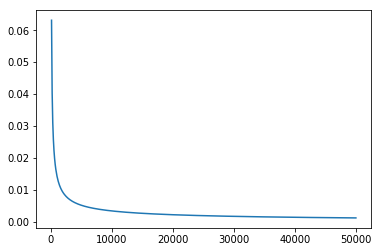

In [89]:
it = 50000
margins, thetas, ranges = logistic_regression_with_records(Xb, Yb, it)
plt.plot(ranges, errors)
print(errors[-1])

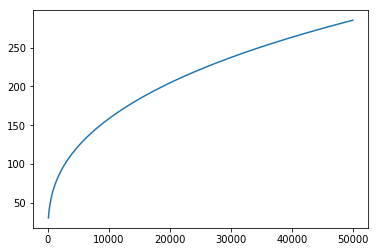

In [90]:
plt.plot(ranges, [np.sum(abs(theta)) for theta in thetas])
plt.show()

In [91]:
def accuracy(theta, Xb, Yb):
    return (Xb.shape[0] - np.sum(np.abs(Xb.dot(theta) / np.abs(Xb.dot(theta)) - Yb) / 2)) / Xb.shape[0]

In [92]:
accuracys = [accuracy(theta, Xb, Yb) for theta in thetas]

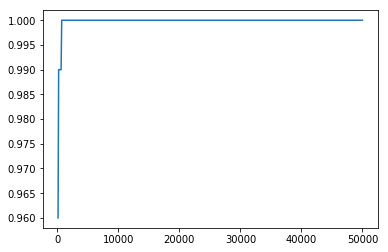

In [93]:
plt.plot(ranges, accuracys)
plt.show()

In [94]:
print(Xb.shape, Yb.shape)

(100, 3) (100,)


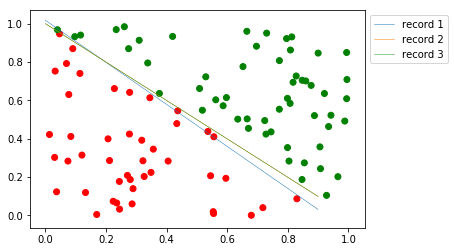

In [95]:
import matplotlib.colors as pltcolor
colors = ['red', 'green']
plt.scatter(Xb[:,1], Xb[:,2], c=Yb, cmap = pltcolor.ListedColormap(colors))
for k, theta in enumerate([thetas[0], thetas[250], thetas[-1]]):
    xs = np.arange(0, 1, 0.1)
    ys = (-theta[0] - theta[1] * xs) / theta[2]
    plt.plot(xs, ys, label='record {0}'.format(k + 1), lw=0.5)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

todo: Not sure.
Theta keeps increasing while accuracy is already quite high, 1.0 actually. The dataset is completely separatable. The scale of theta keeps increasing, so $|\theta^Tx|$ keeps increasing, so probability keeps increasing and hence higher likelihood. Theta will go infinite.

### 2.1.c.

**i. Using a different constant learning rate.**

Yes. If learning rate is extremely small, it may converge since the algorithm's stoping mechanic is when the change of theta is small enough.

**ii. Decreasing the learning rate over time.**

Yes. Same as i.

**iii. Adding a regularization term $∥θ∥^2_2$ to the loss function.**

Yes. There will be a limit to theta.

**iv. Linear scaling of the input features.**

Yes. This may lead to small enough gradient thus small enough margin to converge.

**v. Adding zero-mean Gaussian noise to the training data or labels.**

Yes. The dataset won't be perfectly separatable and there will be a limit to the theta. todo: not sure.

### 2.1.d
Yes. SVM wants bigger margin too.

todo: not sure.